# Complex Ginzburg-Landau (CGL) モデル

\begin{equation}
\dfrac{\partial W}{\partial {t}} =W-\left(1+\mathrm{i} \beta\right)|W|^{2} W+\left(1+\mathrm{i} \alpha\right) \dfrac{ \partial^{2}  W}{\partial x^{2} },
\end{equation}

\begin{equation}W(t,x)\in {\mathrm C}, \alpha,\beta\in{\mathrm R}, t\in [0,T] ,x\in[0, L],
\end{equation}

初期値：一様ランダム

境界条件：周期境界条件($W(t,0)=W(t,L), \forall t\in[0, T]$)

## 離散化した CGL モデル

時間の離散化：オイラー法

空間の離散化：中央差分

で離散化すると，離散化したCGLモデルは

$$ \dfrac{W_{k+1}^n-W_{k}^n}{\Delta {t}} =W_{k}^n-\left(1+\mathrm{i} \beta\right)|W_{k}^n|^{2} W_{k}^n+\left(1+\mathrm{i} \alpha\right) \dfrac{W_{k}^{n-1}+W_{k}^{n+1}-2W_{k}^{n}}{\Delta x^{2} }$$

$$\Leftrightarrow$$


$$ {W_{k+1}^n=W_{k}^n}+\Delta {t}\left[W_{k}^n-\left(1+\mathrm{i} \beta\right)|W_{k}^n|^{2} W_{k}^n\right]　+\dfrac{\Delta {t}}{\Delta x^{2} }\left(1+\mathrm{i} \alpha\right)\left[ W_{k}^{n-1}+W_{k}^{n+1}-2W_{k}^{n}\right]$$

となる．$\Delta {t} $は時間刻み，$\Delta {x} $は空間刻みである．$k\in[0,T\Delta t](\Delta t刻み)$は離散化した時間，$n\in[1,N](\Delta x刻み)$は離散化した空間数Nの番号を表す．

離散化した周期境界条件は，

$W_{k}^{0}=W_{k}^{N},W_{k}^{N+1}=W_{k}^{1}, \forall k\in[0,T\Delta t](\Delta t刻み)$

となる．

以上から，CGL モデルを数値積分してみる．

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### パラメータ

In [2]:
a=2.1 #alpha
b=-1.2 #beta
L=32
T=500
N=128
dt=1e-3

h=L/(N-1)
D=dt/(h*h)

T_step=int(T/dt);

In [3]:
u1R=0.02*np.random.rand(N)-0.01
u1I=0.02*np.random.rand(N)-0.01

u1R_mastar=np.zeros(N);
u1I_mastar=np.zeros(N);
#u1R_mastar=np.random.rand(N,T_step)
#u1I_mastar=np.random.rand(N,T_step)

### 初期値

In [4]:
t=1;
f=1;
Rec_interval=1000;
rec=0;

### 数値積分

In [5]:
%%time
while t<T_step:
    uu1R=u1R;
    uu1I=u1I;
    
    #偏微分のところ．周期境界なのでこう書ける．
    Du1R=uu1R-a*uu1I;
    Du1R_l=np.hstack((Du1R[N-1],Du1R[0:N-1]))
    Du1R_r=np.hstack((Du1R[1:N],Du1R[0]));
    lap_Du1R=Du1R_l+Du1R_r-2*Du1R;

    Du1I=uu1I+a*uu1R;
    Du1I_l=np.hstack((Du1I[N-1],Du1I[0:N-1]));
    Du1I_r=np.hstack((Du1I[1:N],Du1I[0]));
    lap_Du1I=Du1I_l+Du1I_r-2*Du1I;
    
    #main calc
    u1R=uu1R+dt*(
        uu1R-(uu1R**2+uu1I**2)*(uu1R-b*uu1I)
        )+D*lap_Du1R;
    
    u1I=uu1I+dt*(
        uu1I-(uu1R**2+uu1I**2)*(uu1I+b*uu1R)
        )+D*lap_Du1I;
    
    #record
    if np.mod(t-1,Rec_interval)==0:
        rec=1;
    
    if rec==1:
        
        #u1R_mastar=np.vstack(u1R_masetr,u1R);
        #u1I_mastar=np.vstack(u1I_master,u1I);

        f=f+1;
        rec=0;
        
    t=t+1;


Wall time: 28.5 s


### 図の表示

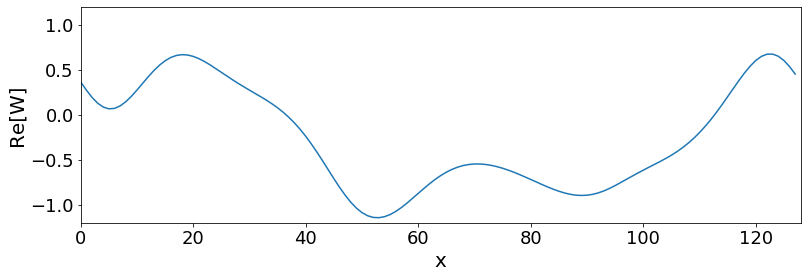

In [72]:
%matplotlib inline
fig = plt.figure(figsize=(10, 3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("Re[W]",fontsize=20)
plt.xlim([0,N])
plt.ylim([-1.2,1.2])
plt.tick_params(labelsize = 18)
ax.plot(u1R)


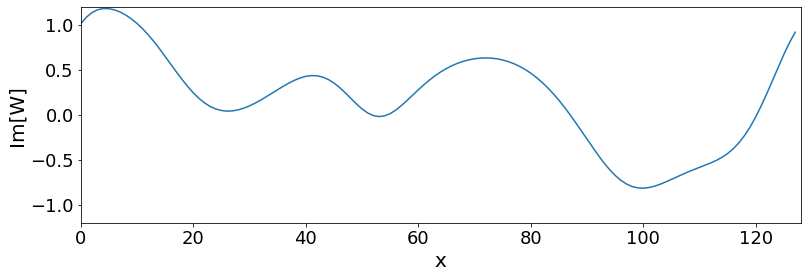

In [73]:
%matplotlib inline
fig = plt.figure(figsize=(10, 3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("Im[W]",fontsize=20)
plt.xlim([0,N])
plt.ylim([-1.2,1.2])
plt.tick_params(labelsize = 18)
ax.plot(u1I)

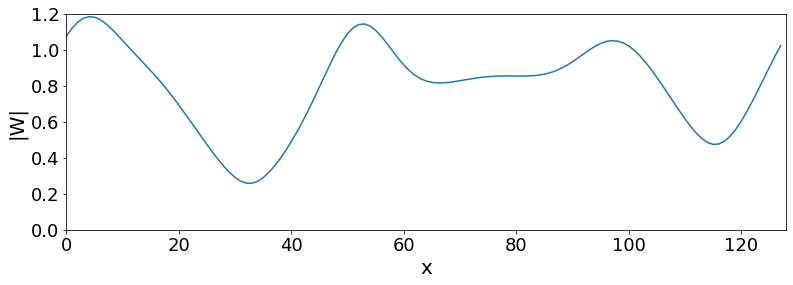

In [74]:
absW=np.sqrt(np.power(u1R,2)+np.power(u1I,2))
%matplotlib inline
fig = plt.figure(figsize=(10, 3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("|W|",fontsize=20)
plt.xlim([0,N])
plt.ylim([0,1.2])
plt.tick_params(labelsize = 18)
ax.plot(absW)